# **Tokenization**


In [ ]:
##for .txt only

# with open("/content/The-Book-of-Five-Rings-by-Musashi-Miyamoto.pdf","r",encoding="utf-8") as f:
#   d = f.read()

# print("Total number of characters",len(d))
# print("Total number of words",len(d.split()))
# print(d[:100])

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import PyPDF2

# Open the PDF file
# with open("/content/The-Book-of-Five-Rings-by-Musashi-Miyamoto.pdf", "rb") as f:
#     reader = PyPDF2.PdfReader(f)
#     text = ""
#     for page in reader.pages:
#         text += page.extract_text() or ""  # Extract text from each page

# print("Total number of characters:", len(text))
# print("Total number of words:", len(text.split()))
# print(text[:100])  # Print the first 100 characters


In [ ]:
with open("/content/The-Book-of-Five-Rings-by-Musashi-Miyamoto.pdf","rb") as f:
  reader = PyPDF2.PdfReader(f)
  text = ""
  for page in reader.pages:
    # print(page.extract_text())
    text += page.extract_text()


print("Total num of characters:",len(text))
print("Total words:",len(text.split()))
print(text[100:300])

FileNotFoundError: [Errno 2] No such file or directory: '/content/The-Book-of-Five-Rings-by-Musashi-Miyamoto.pdf'

now we have loaded text now we need to split the text and do some preprocessing


In [ ]:
import re

my = "Prabhakar sharma is a good boy. From sharda university"
res = re.split(r'(\s)',my)
print(res)

['Prabhakar', ' ', 'sharma', ' ', 'is', ' ', 'a', ' ', 'good', ' ', 'boy.', ' ', 'From', ' ', 'sharda', ' ', 'university']


Here we got our individual words ,whitespace, punctuations etc, but there is a problem we can see the text is splitted on basis of whitespace so comma,fullstop is with words

Modidy reg exp to split on the basis of whitespace,comma,fullstop etc

In [ ]:
res = re.split(r'([,.]|\s)',my)
print(res)

['Prabhakar', ' ', 'sharma', ' ', 'is', ' ', 'a', ' ', 'good', ' ', 'boy', '.', '', ' ', 'From', ' ', 'sharda', ' ', 'university']


Now we are getting everything seperate cool just need to remove whitespace because it's also counted as token

In [ ]:
res = [i for i in res if i.strip()]
res

['Prabhakar',
 'sharma',
 'is',
 'a',
 'good',
 'boy',
 '.',
 'From',
 'sharda',
 'university']

**Remove or not whitespace** It depends on use case to remove or not whitespace case 1) remove whitespace when not necessary- it'll help in saving computation resource   case 2) Not remove whitespace- some applications require not removal of whitesapce like if we are training model to generate python code to identation and spacing is important so we can't train model without spacing

we need more robust regrex function to seprate ?., etc not just fullstop and comma

In [ ]:
text  = "Hello guys. Am i audible? yes! i'm --"
res2 = re.split(r'([,.?;:_!"()\'] | --|\s)',text)
res2 = [i.strip() for i in res2 if i.strip()]
res2

['Hello', 'guys', '.', 'Am', 'i', 'audible', '?', 'yes', '!', "i'm", '--']

Now let's use this to apply at our book data

In [ ]:
preprocessed_data = re.split(r'([,.?;:_!"()\']|--|\s)', text)
preprocessed_data = [i.strip() for i in preprocessed_data if i.strip()]
preprocessed_data[:20]

['The',
 'Book',
 'of',
 'Five',
 'Rings',
 'Miyamoto',
 ',',
 'Musashi',
 'Published',
 ':',
 '1644',
 'Categories',
 '(',
 's',
 ')',
 ':',
 'Non-Fiction',
 ',',
 'Philosophy',
 'Source']

# Step 2 convert token into Token ids

let's create vocabulary of preprocessed data

In [ ]:
preprocessed_data = sorted(set(preprocessed_data))
print((preprocessed_data[:20]))
print("Vocab Size :",len(preprocessed_data))

['!', '"', "'", '(', ')', '+artha', ',', '-', '-Nonexisting', '-allthevices', '-allthings', '-allthree', '-this', '.', '//www', '1', '10ofthemerchant', '11Moreover', '12Chapter', '13']
Vocab Size : 4629


Assign token id

In [ ]:
vocab ={token:id for id,token in enumerate(preprocessed_data)}
print(vocab)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, '+artha': 5, ',': 6, '-': 7, '-Nonexisting': 8, '-allthevices': 9, '-allthings': 10, '-allthree': 11, '-this': 12, '.': 13, '//www': 14, '1': 15, '10ofthemerchant': 16, '11Moreover': 17, '12Chapter': 18, '13': 19, '13wisdom': 20, '14Grip': 21, '1532': 22, '1584–June': 23, '15theseat': 24, '1644': 25, '1645': 26, '16hemay': 27, '17spring': 28, '1886': 29, '18Continuous': 30, '19': 31, '1928': 32, '1960s': 33, '19You': 34, '1About': 35, '1THE': 36, '2': 37, '20aside': 38, '20th': 39, '21To': 40, '22Oral': 41, '23Chapter': 42, '24Stand': 43, '25Alternatively': 44, '26check': 45, '27Knowing': 46, '28afortified': 47, '29Inlarge-scale': 48, '2Introduction': 49, '2THE': 50, '3': 51, '3-5': 52, '30things': 53, '31The': 54, '32The': 55, '33': 56, '34Ofcourse': 57, '35Chapter': 58, '36inferior': 59, '37Without': 60, '380BC': 61, '38you': 62, '39condition': 63, '3Chapter': 64, '3THE': 65, '4': 66, '40Speed': 67, '41Inthis': 68, '42Chapter': 69, '43SHINMEN'

now we have vocab with associated unique integer . But later we need a function which will convert these numbers back into words or respective tokens

So let's create a class for this

In [ ]:
class SimpleTokenizer1:
  def __init__(self,vocab):
    self.str_to_int = vocab  #wil be used for encoding
    self.int_to_str = {id:token for token,id in vocab.items()}  #will be used for decoding

  def encode(self, text):
    preprocessed = re.split(r'([,.?;:_!"()\'] | --|\s)',text)

    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text



In [ ]:
tokenizer = SimpleTokenizer1(vocab)

test_text = """The Book of Five Rings
Miyamoto, Musashi"""
ids = tokenizer.encode(test_text)
print(ids)


[668, 158, 2992, 256, 579, 489, 6, 494]


In [ ]:
tokenizer.decode(ids)

'The Book of Five Rings Miyamoto, Musashi'

Our encoding and decoding is working fine but what if we get any word which is not present in our training data we'll get error so we need a large and diverse training data but still we can get any word which is not present in training data

# Adding Special Context Tokens

So we will modiy our SImpleEncoder function to handle unkown words which were not present in training data


<|unk|> and <|endoftext|> these two will be last two tokens so they will be assigned largest id     ex: last word of vocab is king->700 sp <|unk|>->702,<|endoftext|>->701

**so if we get any unkown text it'll be assigned |unk|**

|endoftext| will be used after a document is completed.    ex- while training gpt multiple books were used so after a book all data was encoded . this |endoftext| is added so there is no relation between previous book and next book

Now we'll add these two token into our tokenizer

In [ ]:
all_tokens = sorted(list(set(preprocessed_data)))
all_tokens.extend(["<|endoftext|>","<|unk|>"])

vocab = {token: id for id,token in enumerate(all_tokens)}

In [ ]:
len(vocab.items())

4631

**Let's implement version 2**

In [ ]:
class SimpleTokenizer2:
  def __init__(self,vocab):
    self.str_to_int = vocab  #wil be used for encoding
    self.int_to_str = {id:token for token,id in vocab.items()}  #will be used for decoding

  def encode(self, text):
    preprocessed = re.split(r'([,.?;:_!"()\'] | --|\s)',text)

    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    preprocessed = [item if item in self.str_to_int else "<|unk|>" for item in preprocessed]
    ids = [self.str_to_int[s] for s in preprocessed]
    return ids

  def decode(self,ids):
    text = " ".join([self.int_to_str[i] for i in ids])
    text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text



In [ ]:
tokenizer2 = SimpleTokenizer2(vocab)
text1 = "Habu Dabu,do you like tea?"
text2 = "The Book of Five Rings"

text_final = "<|endoftext|>".join((text1,text2))
print(text_final)

Habu Dabu,do you like tea?<|endoftext|>The Book of Five Rings


In [ ]:
tokenizer2.encode(text_final)

[4630, 4630, 4621, 2746, 4630, 158, 2992, 256, 579]

In [ ]:
tokenizer2.decode(tokenizer2.encode(text_final))

'<|unk|> <|unk|> you like <|unk|> Book of Five Rings'

we have |unk|,||endoftext| after these two we have some more special tokens    [BOS](Begining of sequence)-It marks the sart of a text.
[EOS](end of sequence) - Similar to |endoftext| it's used to when two unrealted text are combined.

[PAD]-Used to make the length of texts equal basic whi padding wala kaam

Now we are able to handle the unkown text we are not getting any error

--Gpt tokenizer don't use any of these special tokens t only used    "|endoftext|" token

--Gpt don't use |unk| to handle oov words instead it uses ***bye pair encoding***     (breaks word into subwords)

Now implementing complete tokenizer like used for gpt is hard and will consume time so we'lll use the same tokenizer used by openai for gpt

We have now complete understanding of tokenizer so we can use prebuilt one

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00


In [ ]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

It'll be similar to our Simpletokenizer2 we had implemented

In [ ]:
text1 = {
    "text": "Habu Dabu, do you like tea? <|enoftext|> Miyamoto Musashi (c. 1584–June 13 (Japanese calendar: May 19), 1645). My name is Prabhakar."
}

integers = tokenizer.encode(text1['text'], allowed_special={"<|endoftext|>"})
print(integers)


[39, 397, 84, 360, 397, 84, 11, 466, 345, 588, 8887, 30, 1279, 91, 268, 1659, 5239, 91, 29, 29464, 25384, 2629, 12144, 357, 66, 13, 1315, 5705, 1906, 15749, 1511, 357, 25324, 11845, 25, 1737, 678, 828, 1467, 2231, 737, 2011, 1438, 318, 1736, 397, 43573, 283, 13]


In [ ]:
strings = tokenizer.decode(integers)
print(strings)

Habu Dabu, do you like tea? <|enoftext|> Miyamoto Musashi (c. 1584–June 13 (Japanese calendar: May 19), 1645). My name is Prabhakar.


**Observations**   Bpe reduces tokens count around 50k and it also handles oov by bring words to subwords and character level

In [ ]:
fun_try = tokenizer.encode("Kya be bhutnike")
print(fun_try)
strs = tokenizer.decode(fun_try)
print(strs)

#working fine on any ranodm text

[42, 3972, 307, 275, 71, 315, 77, 522]
Kya be bhutnike


# **Input Output Pairs**

It's same like in next word prediction we use previous word to predict next ord,in next iteration starting two word will be used to predict 3rd word like this goes till last word. Similar to stock price prediction data

basically starting word ko lenge next predict krenege baki ko mask kr denge, next iteration mai starting 2 word lenge or 3rd predict krenge ,next iteration mai 3 words lenge or 4th predict krenge or krte jyege.             this technique is called self supervised learning ,auto regressive learning,unsupervised learning

# Creating Input-output pairs

will create data laoder which will use sliding window appraoch

In [ ]:
enc_text = tokenizer.encode(text)
print(len(enc_text))
print(len(text))

#we have applied byte pair encoding to text data now it's in subwords and characters

24021
91238


context size = sliding window size = no of words used to predict next word

In [ ]:
context_size = 6   #input len,means model is trained to look at a sequence of 6 words to predict next word in sequence.
#The input  x is first six tokens [1,2,3,4,5,6] and target y is next 6 tokens [2,3,4,5,6,7]


X = enc_text[:context_size]
Y = enc_text[1:context_size+1]
print(X)
print(Y)

[464, 4897, 286, 10579, 26028, 198]
[4897, 286, 10579, 26028, 198, 44]


In [ ]:
for i in range(1,context_size+1):
  context = enc_text[:i]
  desired_text =enc_text[i]
  print(context,"------->",desired_text)

[464] -------> 4897
[464, 4897] -------> 286
[464, 4897, 286] -------> 10579
[464, 4897, 286, 10579] -------> 26028
[464, 4897, 286, 10579, 26028] -------> 198
[464, 4897, 286, 10579, 26028, 198] -------> 44


**In llms one input-ouput pair have predictions equal to context size,like in regression and classification one input and target have one prediction**     ex 6 context size so 6 predictions

In [ ]:
for i in range(1,context_size+1):
  context = enc_text[:i]
  desired_text =enc_text[i]
  print(tokenizer.decode(context),"------->",tokenizer.decode([desired_text]))

The ------->  Book
The Book ------->  of
The Book of ------->  Five
The Book of Five ------->  Rings
The Book of Five Rings -------> 

The Book of Five Rings
 -------> M


Now we have a basic input output paris generator but we want a structured way or methods so we can compute the tokenization parallely on gpu or cpu

We'll implement a efficient data laoder that takes input and targets as pytorch tensors,which is n0dimentional arrays .we can do parallel processing

Here we want only 2 tensors one is input tensor containing text that llm will use a input to predict and tensor two which is target

**Implmenting a Data Loader**

For efficient data loader implementation we'll use Pytorch built in Dataset and Dataloader classes

In [ ]:
#step1: Toekenizer entire text
#step2:Use sliding window appraoch to chunk the book into overlapping sequences of max_length
#step3:Return total number of rows in dataset
#step4:Return a single row from dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDataset1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i+1:i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


now we'll create Dataloader which wil use GPTDataset1 to load the inputs in baches via pytoch Dataloader

s1:initialize the tokenizer            
s2:create Dataset                 
s3:drop_last = True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training                     
s4:no. of cpu processes to use for preprocessing

In [ ]:
import tiktoken
from torch.utils.data import DataLoader

def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=True, drop_last=True, num_workers=0):
    # Initialize tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDataset1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader


Let's test these

In [ ]:
dataloader = create_dataloader_v1(text,batch_size=1,max_length=4,stride=1,shuffle=False)
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)
sec_batch = next(data_iter)
print(sec_batch)

[tensor([[  464,  4897,   286, 10579]]), tensor([[ 4897,   286, 10579, 26028]])]
[tensor([[ 4897,   286, 10579, 26028]]), tensor([[  286, 10579, 26028,   198]])]


working fine first batch contains two tensors 1.input tenosr 2. output tensors

low stride - more overalp of words- overfitting

Creating Token Embeddings with examples

quick  fox   is   in   the   house  4  0  3  2  5  1  , for keeping it simple we have took 6 words only and if size 3

In [ ]:
input_ids = torch.tensor([2,3,5,1])
vocab_size = 6
output_dim = 3

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size,output_dim)


In [ ]:
print(embedding_layer.weight)   #this matrix is lookup table (lookup table is nothing we can pass the index and get the vector )

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [ ]:
print(embedding_layer(torch.tensor([3])))

tensor([[-0.4015,  0.9666, -1.1481]], grad_fn=<EmbeddingBackward0>)


In [ ]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size,output_dim)

In [ ]:
max_length = 4  #contex_size
dataloader = create_dataloader_v1(text,batch_size=8,max_length=max_length,stride=1,shuffle=False)
data_iter = iter(dataloader)
inputs,targets = next(data_iter)
print(targets)
print("Input shape:",inputs.shape)

tensor([[ 4897,   286, 10579, 26028],
        [  286, 10579, 26028,   198],
        [10579, 26028,   198,    44],
        [26028,   198,    44,  7745],
        [  198,    44,  7745, 25384],
        [   44,  7745, 25384,    11],
        [ 7745, 25384,    11,  2629],
        [25384,    11,  2629, 12144]])
Input shape: torch.Size([8, 4])


we have tensor of size 8*4 dim,meaning data batch consists of 8 text samples with 4 tokens each


Let's now use embedding layer to embed these token ids into 256-dimensional vectors

In [ ]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

# sentence_embeddings = pooling_layer(token_embeddings)
# print(sentence_embeddings.shape

torch.Size([8, 4, 256])


Now for gpt's absolute embedding appraoch,we need to create another embedding layer that has same dimension

In [ ]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length,output_dim)

Creating  postional embedding vectors 4*256 becuase our context_size is 4

In [ ]:
pos_embedding_layer = pos_embedding_layer(torch.arange(max_length))
print(pos_embedding_layer.shape)

torch.Size([4, 256])


# **Attention Mechnaism**

Implementing a simplified attention mechanism,will use 3 dimensional vector for this

In [ ]:
inputs = torch.tensor(
    [[0.43,0.15,0.89], #Your (X^1)
     [0.55,0.87,0.66], #journey(x^2)
     [0.57,0.85,0.64], #starts (X^3)
     [0.22,0.58,0.33], #with (X^5)
     [0.05,0.80,0.55] #step (X^6)


    ]
)

In [ ]:
import matplotlib.pyplot as plt
from  mpl_toolkits import Axes3D

words = ["Your","journey","starts","with","one","step"]


In [ ]:
query = inputs[1]  #2nd input token is query(journey)


attn_scores_2 = torch.empty(inputs.shape[0])
for i,x_i in enumerate(inputs):
  attn_scores_2[i] = torch.dot(x_i,query)  #dot produc to find similarity between query and the embedding vectors or other words

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 1.0865])


now normalize the attention scores to make them fall in a range and their weights sum up to 1. 2nd llm work better if it's in a range 0-1 because normalization helps to reach optimal state fast

In [ ]:
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()

print("Attention weights:",attn_weights_2_tmp)
print("Sum:",attn_weights_2_tmp.sum())

Attention weights: tensor([0.1630, 0.2554, 0.2520, 0.1441, 0.1856])
Sum: tensor(1.)


Above i ahve implemented a simple normalization but it's recommended to use softmax for normalization because it's gives values values which are favourable for gradient process.

In [ ]:
def softmax_naive(X):
  return torch.exp(X)/torch.exp(X).sum(dim=0)

attn_weights_2_navie = softmax_naive(attn_scores_2)
# print("Attention weights:",attn_scores_2)1

print("Normalized attention weights:",attn_weights_2_navie)
print("Sum:",attn_weights_2_navie.sum())

Normalized attention weights: tensor([0.1554, 0.2667, 0.2616, 0.1390, 0.1773])
Sum: tensor(1.)


But there is problem with this navie softmax implementation it'll face problem of overflow when dealing with large number and it'll face problem of underflow when dealing with small number

In [ ]:
attn_weights_2 = torch.softmax(attn_scores_2,dim=0)
print("Attention weights:",attn_weights_2)

print("Sum:",attn_weights_2.sum())


Attention weights: tensor([0.1554, 0.2667, 0.2616, 0.1390, 0.1773])
Sum: tensor(1.)


In [ ]:
query = inputs[1] #2nd input token

context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
  context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4021, 0.7002, 0.6251])


till now we have computed attention weight for journey 2nd(1 index) token we can extend this and compute attention for all inputs

In [ ]:
attn_scores = torch.empty(6,6)

for i,x_i in enumerate(inputs):
  for j,x_j in enumerate(inputs):
    attn_scores[i,j] = torch.dot(x_i,x_j)

print(attn_scores)

tensor([[9.9950e-01, 9.5440e-01, 9.4220e-01, 4.7530e-01, 6.3100e-01, 8.5403e+20],
        [9.5440e-01, 1.4950e+00, 1.4754e+00, 8.4340e-01, 1.0865e+00, 1.6427e-07],
        [9.4220e-01, 1.4754e+00, 1.4570e+00, 8.2960e-01, 1.0605e+00, 6.1949e-04],
        [4.7530e-01, 8.4340e-01, 8.2960e-01, 4.9370e-01, 6.5650e-01, 4.5447e+30],
        [6.3100e-01, 1.0865e+00, 1.0605e+00, 6.5650e-01, 9.4500e-01, 1.9284e+31],
        [3.2314e-18, 1.1963e+22, 2.1069e-07, 1.0074e-11, 2.1888e+23, 4.1725e-08]])


Getting correct result but 2 for loops are comptationally expensive so'll use another appraoch using linear lagebra

we used for loops which are slower ,we can get the same result by matrix multiplicaiton

In [ ]:
attn_scores = inputs @ inputs.T    #@ for matrix multiplication
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.6565],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.9450]])


In [ ]:
attn_weights = torch.softmax(attn_scores,dim=-1)
print(attn_weights)

tensor([[0.2390, 0.2285, 0.2257, 0.1415, 0.1653],
        [0.1554, 0.2667, 0.2616, 0.1390, 0.1773],
        [0.1563, 0.2664, 0.2616, 0.1397, 0.1760],
        [0.1643, 0.2374, 0.2341, 0.1673, 0.1969],
        [0.1537, 0.2423, 0.2361, 0.1576, 0.2103]])


dim=-1 ,we are instructing softmax function to apply normalization along the last dimension of the attn_scores

so let's calculate final context_vector instead of multiplying then adding the attn_weights and query ,we can get this result just by matrix multiplication

In [ ]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)

tensor([[0.3965, 0.6408, 0.6456],
        [0.4021, 0.7002, 0.6251],
        [0.4024, 0.6994, 0.6253],
        [0.3813, 0.6847, 0.6162],
        [0.3791, 0.6942, 0.6155]])


We can find attention weights using this appraoch and can capture some context but still we can't understand and capture all context without trainable weights

ex- The cat sat on the mat vecause it was warm      without Trainable weights: it'll not pay that much attnetion to mat and warm because both are not realated but it's not true we should focus on both


With Trainable weights: model can learn "warm" should pay more attention to "mat" even if "mat" is not semantically similar to "warm"

In short without trainable weights it'll focus only on words related to query,and will leave others and will lost long-term dependency.

# Implementing Self Attention With Trainable Weights

In [1]:
import torch
inputs = torch.tensor(
    [[0.43,0.15,0.89], #Your (X^1)
     [0.55,0.87,0.66], #journey(x^2)
     [0.57,0.85,0.64], #starts (X^3)
     [0.22,0.58,0.33], #with (X^4)
     [0.05,0.80,0.55] #step (X^5)


    ]
)

A second input element      #B the input Embedding size,d=3    #C The output embedding size ,d_out=2

In [2]:
X_2 = inputs[1]  #A
d_in = inputs.shape[1] #B  #here dIn is of same dim of input tensor for multiplication of metrics
d_out = 2   #C

In got models input and output dimentions are same but here we are using diffeerent input-outputu dim to better understand

Let's initalize weight metrics Wq,Wk,Wv

In [3]:
W_quer = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)
W_val = torch.nn.Parameter(torch.rand(d_in,d_out),requires_grad=False)

In [4]:
print(W_quer)
print(W_key)
print(W_val)

Parameter containing:
tensor([[0.9089, 0.4462],
        [0.3106, 0.7836],
        [0.0770, 0.3783]])
Parameter containing:
tensor([[0.1432, 0.4438],
        [0.1797, 0.1969],
        [0.3622, 0.8838]])
Parameter containing:
tensor([[0.0536, 0.6529],
        [0.9413, 0.9484],
        [0.1727, 0.1237]])


Let's compute query,key and value  for 2nd input vector

In [5]:
query_2 = X_2 @ W_quer
key_2 = X_2 @ W_key
value_2 = X_2 @W_val

print(query_2)
print(key_2)
print(value_2)

tensor([0.8210, 1.1768])
tensor([0.4742, 0.9987])
tensor([0.9624, 1.2658])


Let's calculate all key and values for all input via matrix multiplication

In [6]:
keys = inputs @W_key
values = inputs @ W_val
queries = inputs @ W_quer

print("keys shape:",keys.shape)
print("values",values.shape)
print("queries",queries.shape)


keys shape: torch.Size([5, 2])
values torch.Size([5, 2])
queries torch.Size([5, 2])


I have successfully rjected 6 input tokens from a 3d into a 2d embedding space

Calculate attention scores for query 2

In [7]:
attn_scores_2 = query_2 @keys.T
print(attn_scores_2)

tensor([1.5224, 1.5646, 1.5430, 0.8021, 1.0710])


calculate attention scores for all input tokens

In [8]:
attn_scores = queries @keys.T

In [9]:
print(attn_scores)

tensor([[0.8585, 0.8851, 0.8729, 0.4544, 0.6073],
        [1.5224, 1.5646, 1.5430, 0.8021, 1.0710],
        [1.5123, 1.5552, 1.5338, 0.7975, 1.0651],
        [0.8489, 0.8689, 0.8570, 0.4446, 0.5931],
        [1.0014, 1.0156, 1.0020, 0.5175, 0.6885]])


attention weight is nothing just normalized attention scores,earlier we were normalizing it by using softmax function but we'll divide scores by square root of embd dim keys

In [11]:
d_k = keys.shape[-1]
attn_weights_2  = torch.softmax(attn_scores_2/d_k**0.5,dim = -1)
print(attn_weights_2)
print(d_k)

tensor([0.2287, 0.2356, 0.2321, 0.1374, 0.1662])
2


why we are doing square root of values let's understand with example below

In [15]:
tensor = torch.tensor([0.1,-0.2,0.3,-0.2,0.5])
softmax_result = torch.softmax(tensor,dim=-1)
print("Softmax without scaing:",softmax_result)


#multiply tensor by  8 and then apply softmax
scaled_tensor = tensor*8
softmax_scaled_result = torch.softmax(scaled_tensor,dim=-1)
print("Softmax after scaling (tensor*8):",softmax_scaled_result)

Softmax without scaing: tensor([0.1925, 0.1426, 0.2351, 0.1426, 0.2872])
Softmax after scaling (tensor*16): tensor([0.0326, 0.0030, 0.1615, 0.0030, 0.8000])


we can see the max value get's the highest score after normalizing as we can see the 0.28 became 0.8 while oterhs are too low infact some are 15 times less so it's no good

So dot preoduct between query and key becomes too large(example *8) the atention scores results in a very sharp softmax distribtion ,making model overly confident in one particular "key".SUch sharp disrtibution can make learning unstable

In [ ]:
re root not

**Why square root not just dimension** bbecause dot preoduct of Q and K increases variance because mulitplying two random number increases vairance. And the increase in variance grows with dimensions


Diving by square root keeps variace close to 1

In [18]:
import numpy as np

def compute_variance(dim,num_trials=1000):
  dot_products = []
  scaled_dot_products = []

  for _ in range(num_trials):
    q=np.random.randn(dim)
    k=np.random.randn(dim)

    #compute dot product
    dot_product = np.dot(q,k)
    dot_products.append(dot_product)

    #scale dot product by sqrt(dim)
    scaled_dot_product = dot_product/np.sqrt(dim)
    scaled_dot_products.append(scaled_dot_product)

  variance = np.var(dot_products)
  scaled_variance = np.var(scaled_dot_products)

  return variance,scaled_variance


#For dim 5
variance_before_5 ,variance_after_5 = compute_variance(5)
print(f"Variance before scaling: {variance_before_5}")
print(f"Variance after scaling: {variance_after_5}")



#For dim 5
variance_before_30 ,variance_after_30 = compute_variance(30)
print(f"Variance before scaling: {variance_before_30}")
print(f"Variance after scaling: {variance_after_30}")

Variance before scaling: 4.93239625379989
Variance after scaling: 0.9864792507599779
Variance before scaling: 27.899841693462722
Variance after scaling: 0.929994723115424


we can observe as dim increase variance increase but if we divide it with square root of dim it's always between 0-1

Now compute context vector

In [19]:
context_vec_2 = attn_weights_2 @ values    #context vector for journey
print(context_vec_2)

tensor([0.7437, 0.9557])


Let's implement compact self attention python class

s1: multiply input with weight,key and value to get weight_key,weight_value,weight_query metrics


s2: multiply queries with keys's transpose to get attention scores


s3:scaled the attention scores by dividing it with square root of key's dimension than took softmax of it


s4: multiply the attention weights withv alue metrics to get the context vector

In [20]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

  def __init__(self,d_in,d_out):
    super().__init__()
    self.W_query = nn.Parameter(torch.rand(d_in,d_out))
    self.W_key = nn.Parameter(torch.rand(d_in,d_out))
    self.W_value = nn.Parameter(torch.rand(d_in,d_out))

  def forward(self,X):
    keys = X @ self.W_key
    values = X @ self.W_value
    queries = X @ self.W_query

    attn_scores = queries @ keys.T
    attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim = -1)

    context_vec = attn_weights @ values
    return context_vec

we have inherited pytorch's nn.module to get all functionalities for model layer creation and management

In [22]:
sa_v1 = SelfAttention_v1(d_in,d_out)
print(sa_v1(inputs))

tensor([[0.9120, 0.9843],
        [0.9215, 0.9910],
        [0.9207, 0.9905],
        [0.8847, 0.9668],
        [0.8958, 0.9730]], grad_fn=<MmBackward0>)


got context vector for our input

Let's improve this selfattention class by using pytorch's nn.Linear layers ,which effectively perform matrix multiplication when bias units are disabled

nn.layer has optimized weight initialization scheme

# **nn.Linear layer automatically initializes its weights using a variant of Xavier/Glorot initialization (specifically designed for layers with activations like ReLU)**

In [1]:
import torch.nn as nn

class SelfAttention_v2(nn.Module):

  def __init__(self,d_in,d_out,qkv_bias =False):
    super().__init__()
    self.W_query = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.W_key = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.W_value = nn.Linear(d_in,d_out,bias = qkv_bias)

  def forward(self,X):
    keys = self.W_key(X)
    values = self.W_value(X)
    queries =  self.W_query(X)

    attn_scores = queries @ keys.T
    attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim = -1)

    context_vec = attn_weights @ values
    return context_vec

In [2]:
sa_v2 = SelfAttention_v2(d_in,d_out)
print(sa_v2(inputs))

NameError: name 'd_in' is not defined

resue selfattention_v2

In [ ]:
queries = sa_v2.W_query(inputs)
keys = sa_v2.W_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim = 1)
print(attn_weights)

we'll use  pytorch tril function to create lower triangle for attention we'll use mask metric and multiply it with our attnetion scores

In [ ]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length,context_length))
print(mask_simple)

In [ ]:
masked_simple = attn_weights*mask_simple
print(masked_simple)

now these weights need to be normalized so they sum upto 1

In [ ]:
row_sums = masked_simple.sum(dim = 1,keepdim = True)
masked_simple_norm = masked_simple/row_sums
print(masked_simple_norm)

normailization is done but there is a problem of data leakage becuase we applied softmax earlier and it takes sum of all tokens so it already affected our attention socres so there is data leakage and no benefit of masking the further tokens

In [ ]:
print(attn_scores)

In [ ]:
mask = torch.triu(torch.ones(context_length,context_length),diagonal =1)
masked = attn_scores.masked_fill(mask.bool(),-torch.inf)

print(masked)

In [ ]:
attn_weights = torch.softmax(masked/keys.shape[-1]**0.5,dim = 1)
print(attn_weights)

everything done successfully no data leakage

just need to apply dorpout also   

2 ways to apply dropou
1. after calculating attentin scores(most common way)
2. after applying attention weights to value vectors

In [ ]:
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)

print("No dorpout :",example)
print("Dropout: ",dropout(example))

half(50%) are dorp out so to compensate for reduction in active elements the remained values are doubled

dropout in cnn and rnn ann is different in those neaurons are deactivated and the values are not scaled

In [4]:
class CausalAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,qkv_bias = False):
    super().__init__()
    self.d_out = d_out
    self.W_query = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.W_key = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.W_value = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.dropout = nn.Dropout(dropout)
    self.register_buffer("mask",torch.triu(torch.ones(context_length,context_length),diagonal = 1))

  def forward(self,X):
    b,num_tokens ,d_in = X.shape
    keys  = self.W_key(X)
    queries = self.W_query(X)
    values = self.W_value(X)

    attn_scores = queries @ keys.transpose(1,2)
    attn_scores = attn_scores.masked_fill(self.mask.bool()[:num_tokens,:num_tokens],-torch.inf)   # :num_token
    attn_weights = torch.softmax(attn_scores/keys.shape[-1]**0.5,dim = -1)

    attn_weights = self.dropout(attn_weights)

    context_vec = attn_weights @ values
    return context_vec


In [ ]:
batch = torch.stack((inputs,inputs),dim = 0)
print(batch.shape)

In [ ]:
print(d_out,d_in,batch.shape[1])

In [ ]:
context_length = batch.shape[1]
ca = CausalAttention(d_in,d_out,context_length ,0.0)
context_vec = ca(batch)
print("Context_vecs.shape:",context_vec.shape)

# **Extending SIngle Head Attention To Multi-Head Attention**

implementing multi-head attention involves creating multiple instances of self-attnetion mechanism,each with their own weights combining their outputs

In code we can achieve this by implementing simple MultiheadAttentionWrapper class that stacks multiple instances of our previous CausalAttentionModule:

In [1]:
import torch
import torch.nn as nn

class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout,num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)]
        )

    def forward(self, X):
        return torch.cat([h(X) for h in self.heads], dim=-1)


In [2]:
import torch
inputs = torch.tensor(
    [[0.43,0.15,0.89], #Your (X^1)
     [0.55,0.87,0.66], #journey(x^2)
     [0.57,0.85,0.64], #starts (X^3)
     [0.22,0.58,0.33], #with (X^4)
     [0.77,0.25,.10],  #one (X^5)
     [0.05,0.80,0.55] #step (X^6)


    ]
)
batch = torch.stack((inputs,inputs),dim = 0)
print(batch.shape)

torch.Size([2, 6, 3])


In [5]:
context_length = batch.shape[1]
d_in ,d_out =3,2
mha = MultiHeadAttentionWrapper(d_in,d_out,context_length,0,num_heads=2)
context_vec = mha(batch)
print(context_vec)
print("Context_vecs.shape",context_vec.shape)

tensor([[[ 0.0132, -0.2648,  0.2740, -0.4249],
         [-0.1484, -0.2138,  0.3073, -0.5088],
         [-0.1939, -0.1927,  0.3172, -0.5316],
         [-0.1965, -0.1726,  0.2879, -0.4977],
         [-0.1581, -0.1004,  0.2509, -0.3895],
         [-0.1874, -0.1318,  0.2578, -0.4365]],

        [[ 0.0132, -0.2648,  0.2740, -0.4249],
         [-0.1484, -0.2138,  0.3073, -0.5088],
         [-0.1939, -0.1927,  0.3172, -0.5316],
         [-0.1965, -0.1726,  0.2879, -0.4977],
         [-0.1581, -0.1004,  0.2509, -0.3895],
         [-0.1874, -0.1318,  0.2578, -0.4365]]], grad_fn=<CatBackward0>)
Context_vecs.shape torch.Size([2, 6, 4])


First dim of context vector is 2 since we have two input texts and second dim refers to 6 tokens in each input. The 3rd dim refers to  dimension bevause we had d_out(output dim =2) and 2 heads so 2*2=4

In [6]:
class MultiHeadAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,num_heads,qkv_bias =False):
    super().__init__()
    assert (d_out%num_heads==0),\
      "d_out must be divisibe by num_heads"

    self.d_out = d_out
    self.num_heads = num_heads
    self.head_dim = d_out//num_heads    #reduce projection dim to match desired output dim

    self.W_query = nn.Linear(d_in,d_out,bias =qkv_bias)
    self.W_key = nn.Linear(d_in,d_out,bias =qkv_bias)
    self.W_value = nn.Linear(d_in,d_out,bias = qkv_bias)
    self.out_proj = nn.Linear(d_out,d_out)    #Linear layer to combine head outputs
    self.dropout = nn.Dropout(dropout)
    self.register_buffer("mask",torch.triu(torch.ones(context_length,context_length),diagonal = 1))   #register is used to transfer computation to cpu or gpu which is best

  def forward(self,X):
    b,num_tokens ,d_in = X.shape

    keys  = self.W_key(X)   #shape: (batch ,num_tokens,id_out)
    queries = self.W_query(X)
    values = self.W_value(X)

    #there is no head_dim so we need to create 4th dim for head
    #unroll last dimension of keys,queries and values to include num_heads and head_dim
    #head_dim = d_out/num_heads =6/2 = 3
    #(batch,num_tokens,d_out) -> (batch,num_tokens,num_heads,head_dim)
    #(1,2,6) -> (1,3,2,3)
    keys = keys.view(b,num_tokens,self.num_heads,self.head_dim)
    queries = queries.view(b,num_tokens,self.num_heads,self.head_dim)
    values = values.view(b,num_tokens,self.num_heads,self.head_dim)

    #transpose to get shape (batch,num_heads,num_tokens,head_dim) ->(batch,num_heads,num_tokens,head_dim)
    keys = keys.transpose(1,2)
    queries = queries.transpose(1,2)
    values = values.transpose(1,2)

    #calculate scaled dot-product attention with causal mask
    attn_scores = queries @ keys.transpose(2,3)

    #orignal mask truncated to the number of tokens and converted to boolean
    mask_bool = self.mask.bool()[:num_tokens,:num_tokens]

    #use mask to fill attn scores
    attn_scores.masked_fill(mask_bool,-torch.inf)
    attn_weights = torch.softmax(attn_scores/self.head_dim**0.5,dim = -1)
    attn_weights = self.dropout(attn_weights)

    #shape:(b,num_tokens,num_ehads,head_dim)
    context_vec = (attn_weights @values).transpose(1,2)

    #combine heads,where self.d_out = self.num_heads *self.head_dim
    context_vec = context_vec.contiguous().view(b,num_tokens,self.d_out)
    context_vec = self.out_proj(context_vec) #optional projection

    return context_vec


In [7]:
#test his mha
import torch


inputs = torch.tensor(
    [[0.43,0.15,0.89,0.55,0.87,0.66],
     [0.57,0.85,0.64,0.22,0.58,0.33],
     [0.77,0.25,0.10,0.05,0.80,0.55]]
)

batch = torch.stack((inputs,inputs),dim=0)
print(batch.shape)

batch_size ,context_length ,d_in = batch.shape

d_out = 6

mha = MultiHeadAttention(d_in,d_out,context_length,0,num_heads=2)
context_vecs = mha(batch)

print(context_vecs)
print("Context_vecs.shape",context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[-0.2734, -0.2139, -0.0916,  0.4742, -0.3268, -0.0979],
         [-0.2725, -0.2143, -0.0922,  0.4737, -0.3265, -0.0992],
         [-0.2742, -0.2132, -0.0918,  0.4752, -0.3260, -0.0984]],

        [[-0.2734, -0.2139, -0.0916,  0.4742, -0.3268, -0.0979],
         [-0.2725, -0.2143, -0.0922,  0.4737, -0.3265, -0.0992],
         [-0.2742, -0.2132, -0.0918,  0.4752, -0.3260, -0.0984]]],
       grad_fn=<ViewBackward0>)
Context_vecs.shape torch.Size([2, 3, 6])


Successfully implemented mha

# IMPLEMENTING A GPT MODEL FROM SCRATCH TO GENERATE TEXT

In [8]:
GPT_config_124 = {
    "vocab_size":50257,
    "context_lengh":1024,
    "emb_dim":768,
    "n_heads":12,
    "n_layers":12,
    "drop_rate":0.1,
    "qkv_bias":False
}

GPT ARCHITECTURE PART1:DUMMY GPT MODEL CLASS

ST1: USE placeholder for transformerBlock
st2: Use a placeholder for layernorm

In [9]:
import torch
import torch.nn as nn

class DummyGptModel(nn.Module):
  def __init__(self,cfg ):
    super().__init__()
    self.tok_emb = nn.Embedding(cfg["vocab_size"],cfg["emb_dim"])
    self.pos_emb = nn.Embedding(cfg["context_lengh"],cfg["emb_dim"])
    self.drop_emb = nn.Dropout(cfg["drop_rate"])


    #use a placeholder for TransformerBlock
    self.trf_blocks = nn.Sequential(*[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])

    #use a placeholder for LayerNorm
    self.final_norm = DummyLayerNorm(cfg["emb_dim"])
    self.out_head = nn.Linear(
        cfg["emb_dim"],cfg["vocab_size"],bias = False
    )

  def forward(self,in_idx):
    batch_size ,seq_len = in_idx.shape
    tok_embeds = self.tok_emb(in_idx)
    pos_embeds = self.pos_emb(torch.arange(seq_len,device =in_idx.device))
    X = tok_embeds +pos_embeds
    X = self.drop_emb(X)
    X = self.trf_blocks(X)
    X = self.final_norm(X)
    logits = self.out_head(X)
    return logits

class DummyTransformerBlock(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    #A simple placeholder


  def forward(self,X):
    return X

class DummyLayerNorm(nn.Module):
  def __init__(self,cfg):
    super().__init__()

  def forward(self,X):
    return X

In [10]:
pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.6 MB/s eta 0:00:00


**STEP1: TOKENIZATION**

In [11]:
import torch
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))

batch = torch.stack(batch)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


**CREATE AN INSTANCE OF DUMMYGPTMODEL**

In [12]:
model = DummyGptModel(GPT_config_124)
logits = model(batch)
print("Output shape:",logits.shape)

Output shape: torch.Size([2, 4, 50257])


GPT ARCHITECTURE PART2: LAYER NORMALIZATION

In [13]:
import torch
import torch.nn as nn

# Example input batch
batch_example = torch.randn(2, 5)

# Define the sequential model with a Linear layer followed by a ReLU activation
layer = nn.Sequential(
    nn.Linear(5, 6),  # Linear layer
    nn.ReLU()         # ReLU activation (correct usage)
)
# Pass the batch example through the model
out = layer(batch_example)

# Print the output
print(out)


tensor([[0.0000, 0.9118, 0.0000, 0.0000, 0.6671, 0.0710],
        [0.0000, 0.0000, 1.5023, 0.0000, 0.0000, 0.7273]],
       grad_fn=<ReluBackward0>)


In [14]:
mean = out.mean(dim = -1,keepdim = True)   #dim =-1 because we have do along columns
var = out.var(dim = -1,keepdim = True)
print("Mean:",mean)
print("Variance:",var)

Mean: tensor([[0.2750],
        [0.3716]], grad_fn=<MeanBackward1>)
Variance: tensor([[0.1656],
        [0.3915]], grad_fn=<VarBackward0>)


In [15]:
out_norm = (out-mean)/torch.sqrt(var)
mean = out_norm.mean(dim = -1,keepdim = True)
var = out_norm.var(dim = -1,keepdim= True)
print("Normalized layer outputs:\n",out_norm)

print("mean:\n",mean)
print("Variance :\n",var)

Normalized layer outputs:
 tensor([[-0.6758,  1.5651, -0.6758, -0.6758,  0.9637, -0.5014],
        [-0.5939, -0.5939,  1.8071, -0.5939, -0.5939,  0.5685]],
       grad_fn=<DivBackward0>)
mean:
 tensor([[-5.9605e-08],
        [-9.9341e-09]], grad_fn=<MeanBackward1>)
Variance :
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


We have implemented layernormalization now let's create a class for it

In [16]:
class LayerNorm(nn.Module):
  def __init__(self,emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self,X):
    mean = X.mean(dim = -1,keepdim = True)
    var = X.var(dim = -1,keepdim =True,unbiased = False)
    norm_X = (X-mean)/torch.sqrt(var+self.eps)
    return self.scale*norm_X + self.shift

epsiloion is added to avoid zero division error

In [17]:
ln = LayerNorm(emb_dim = 5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim = -1,keepdim = True)
var = out_ln.var(dim =-1,unbiased = False,keepdim = True)
print("Mean:\n",mean)
print("Variance:\n",var)

Mean:
 tensor([[4.7684e-08],
        [4.7684e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


batch normalization -normalizes around batch


layer normalization normalizes around -layer


cnn-batch   rnn,transformer->layer norm

**For llms gelu and swiglu is used**

In [18]:
class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self,X):
    return 0.5*X*(1+torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))*(X+0.044715*torch.pow(X,3))))

Let's compare relu and gelu to see the difference between these

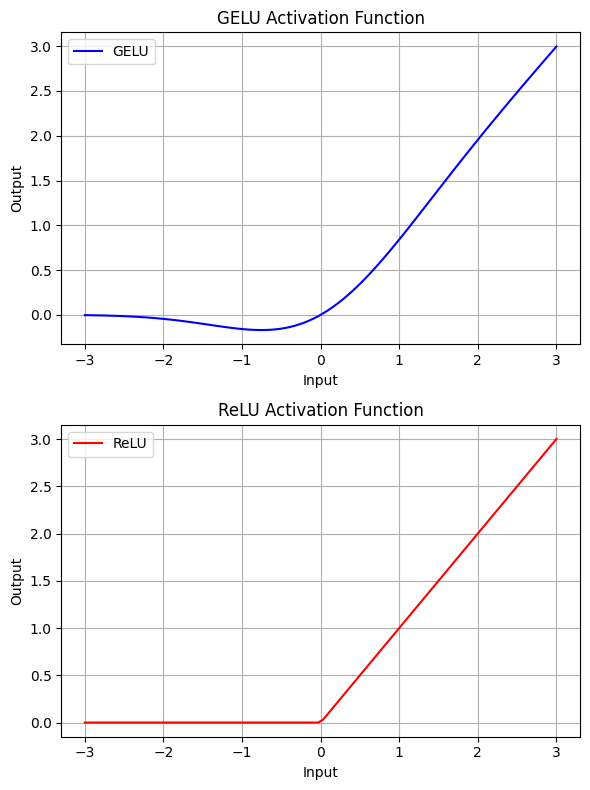

In [19]:
import matplotlib.pyplot as plt
# Create GELU and ReLU instances
gelu, relu = GELU(), nn.ReLU()

# Generate input tensor
X = torch.linspace(-3, 3, 100)

# Apply activations
y_gelu, y_relu = gelu(X), relu(X)

# Plot both activations
plt.figure(figsize=(6, 8))
for i, (y, label, color) in enumerate([(y_gelu, "GELU", 'blue'), (y_relu, "ReLU", 'red')]):
    plt.subplot(2, 1, i+1)
    plt.plot(X.numpy(), y.numpy(), label=label, color=color)
    plt.title(f"{label} Activation Function")
    plt.xlabel("Input")
    plt.ylabel("Output")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

smooth cureve can lead to better optimization properties during training

relu not differentiable at 0 ,but gelu is

gelu is not zero for negative value

role of feedforwad network- the self attetnion mechanism only see how much importance should be given to each word . and the dimensions are fix

but when we add feedforward neural network more neurons are added

so we had input dim of 768 and we are projecting the imput into 4 times larger dimension(4 neurons or feedforwad nn layer) it will help the transformer to explroe more in this 4 times bigger dimension

# FeedForward n//n implemnt Part 3

In [20]:
class FeedForward(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"],4*cfg["emb_dim"]),  #expand dim to explore more
        GELU(),    #activation
        nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"])    #contraction of dim to orginal dim of output
    )

  def forward(self,X):
      return self.layers(X)

In [21]:
print(GPT_config_124["emb_dim"])

768


Test ff nn


In [22]:
ffn = FeedForward(GPT_config_124)
X = torch.rand(2,4,768)
out = ffn(X)
print(out.shape)

torch.Size([2, 4, 768])


**SHORTCUT CONNECTIONS PART 4**

In [23]:
import torch
import torch.nn as nn

class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[1]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), GELU())
        ])

    def forward(self, X):
        for layer in self.layers:
            layer_output = layer(X)

            # Applying shortcut connection
            if self.use_shortcut and X.shape == layer_output.shape:
                X = X + layer_output
            else:
                X = layer_output

        return X


In [24]:
layer_sizes = [3,3,3,3,3,1]
sample_input = torch.tensor([[1.,0,-1]])
model_without_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes ,use_shortcut = False
)

In [25]:


def print_gradient(model, X):
    output = model(X)
    target = torch.tensor([[0.0]])

    # Calculate loss based on how close the target is
    loss_fn = nn.MSELoss()
    loss = loss_fn(output, target)

    # Backward pass to calculate the gradients
    loss.backward()

    # Print the gradients of the weights
    for name, param in model.named_parameters():
        if "weight" in name and param.grad is not None:
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")


In [26]:
print_gradient(model_without_shortcut,sample_input)

layers.0.0.weight has gradient mean of 1.849435648182407e-05
layers.1.0.weight has gradient mean of 3.1618601497029886e-05
layers.2.0.weight has gradient mean of 0.00016230760957114398
layers.3.0.weight has gradient mean of 0.0005445715505629778
layers.4.0.weight has gradient mean of 0.0014962060377001762


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


we can see the layer 0
 is facing vanishsing gradient problem

In [27]:
model_with_shortcut = ExampleDeepNeuralNetwork(
    layer_sizes, use_shortcut = True
)
print_gradient(model_with_shortcut,sample_input)

layers.0.0.weight has gradient mean of 2.8950865268707275
layers.1.0.weight has gradient mean of 3.535364866256714
layers.2.0.weight has gradient mean of 2.278616189956665
layers.3.0.weight has gradient mean of 1.619220495223999
layers.4.0.weight has gradient mean of 1.509148359298706


we can see we have added skipped connection not not facing vanishing gradient problem


CODE ENTIRE GPT2: PART 5

In [28]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

In [29]:
class LayerNorm(nn.Module):
  def __init__(self,emb_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(emb_dim))
    self.shift = nn.Parameter(torch.zeros(emb_dim))

  def forward(self,X):
    mean = X.mean(dim = -1,keepdim = True)
    var = X.var(dim = -1,keepdim =True,unbiased = False)
    norm_X = (X-mean)/torch.sqrt(var+self.eps)
    return self.scale*norm_X + self.shift


class GELU(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self,X):
    return 0.5*X*(1+torch.tanh(torch.sqrt(torch.tensor(2.0/torch.pi))*(X+0.044715*torch.pow(X,3))))


class FeedForward(nn.Module):
  def __init__(self,cfg):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(cfg["emb_dim"],4*cfg["emb_dim"]),  #expand dim to explore more
        GELU(),    #activation
        nn.Linear(4*cfg["emb_dim"],cfg["emb_dim"])    #contraction of dim to orginal dim of output
    )

  def forward(self,X):
      return self.layers(X)

**Let's code transformer block**

st1:shortcut connection   

st2: shprtcut connection for feed forward block

st3: add orignal input back


In [30]:
class TransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.att = MultiHeadAttention(
            d_in=cfg["emb_dim"],
            d_out=cfg["emb_dim"],
            context_length=cfg["context_length"],
            num_heads=cfg["n_heads"],
            dropout=cfg["drop_rate"],
            qkv_bias=cfg["qkv_bias"])
        self.ff = FeedForward(cfg)
        self.norm1 = LayerNorm(cfg["emb_dim"])
        self.norm2 = LayerNorm(cfg["emb_dim"])
        self.drop_shortcut = nn.Dropout(cfg["drop_rate"])

    def forward(self, x):
        # Shortcut connection for attention block
        shortcut = x
        x = self.norm1(x)
        x = self.att(x)  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        # Shortcut connection for feed forward block
        shortcut = x
        x = self.norm2(x)
        x = self.ff(x)
        x = self.drop_shortcut(x)
        x = x + shortcut  # Add the original input back

        return x

In [31]:
X = torch.rand(2,4,768)

block = TransformerBlock(GPT_CONFIG_124M)
out = block(X)
print("input shape:",X.shape)
print("Output shape",out.shape)

input shape: torch.Size([2, 4, 768])
Output shape torch.Size([2, 4, 768])


Our **Transformer** block is workin completely fine we can see it's preserving the dimensions

**Implement complete gpt2**

In [32]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


In [33]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [34]:
torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
out = model(batch)
print("Input batch:\n", batch)
print("\nOutput shape:", out.shape)
print(out)

Input batch:
 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])

Output shape: torch.Size([2, 4, 50257])
tensor([[[-0.0072, -0.2137, -0.3467,  ..., -0.3240, -0.2338, -0.1070],
         [ 0.7063, -0.7429, -0.6645,  ..., -0.6530, -0.1393, -0.2166],
         [ 0.8226, -0.2982, -0.4547,  ...,  0.0913, -0.6949, -0.2091],
         [-0.3933,  0.3074, -0.1343,  ...,  1.0464,  0.4620, -0.5298]],

        [[ 0.1386, -0.4081, -0.1563,  ..., -0.0892, -0.0672, -0.0157],
         [ 0.2353, -0.1177, -0.1307,  ...,  1.0729, -0.3517,  0.3905],
         [ 0.7367,  0.3377, -0.4311,  ...,  0.8471,  0.2219, -0.2541],
         [ 0.0166, -0.0721,  0.3451,  ...,  1.1352, -0.4069,  0.0309]]],
       grad_fn=<UnsafeViewBackward0>)


In [35]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of parameters: {total_params:,}")

Total number of parameters: 163,009,536


actual gpt2 had 124m parameters bt this is having more than 163m parameters it's becuse of weight tying let's understand it with code

In [36]:
print("Token embedding layer shape:", model.tok_emb.weight.shape)
print("Output layer shape:", model.out_head.weight.shape)

Token embedding layer shape: torch.Size([50257, 768])
Output layer shape: torch.Size([50257, 768])


The token embedding and output layers are very large due to number of rows for the 50257 in the tokenizer's vocab, Let's remove the output layer parameter count from gpt-2 model count accoring to weight tying

In [37]:
total_params_gpt2 = total_params - sum(p.numel() for p in model.out_head.parameters())
print(f"Number of trainable parameters considering weight tying: {total_params_gpt2:,}")

Number of trainable parameters considering weight tying: 124,412,160


weight tying reduces memory footprint and computational complexity and time of the model. But to get better training and result's it's better not to resue the parameters

let's calculate memory req of 163 million parameters in ut GptModel object

In [38]:
total_size_bytes = total_params *4
total_size_mb = total_size_bytes/(1024*1024)

print(f"Total size of model :,{total_size_mb:.2f} MB")

Total size of model :,621.83 MB


GENERATE TEXT FROM OUTPUT TOKENS

<div class="alert alert-block alert-info">

Step 1: idx is a (batch, n_tokens) array of indices in the current context

Step 2: Crop current context if it exceeds the supported context size E.g., if LLM supports only 5 tokens, and the
context size is 10 then only the last 5 tokens are used as context

Step 3: Focus only on the last time step, so that (batch, n_token, vocab_size) becomes (batch, vocab_size)

Step 4: probas has shape (batch, vocab_size)

Step 5: idx_next has shape (batch, 1)

Step 6: Append sampled index to the running sequence, where idx has shape (batch, n_tokens+1)

</div>

In [39]:
def generate_text_simple(model, idx,max_new_tokens,context_size):

  for _ in range(max_new_tokens):

    #crop current context if it exceeds the supported context size
    idx_cond = idx[:,-context_size:]

    #get the predictions
    with torch.no_grad():
      logits = model(idx_cond)   #batch ,n_tokens,vocab_size

    #focus only on the last time step
    logits = logits[:,-1,:]

    #apply softmax to get probabilities
    probas = torch.softmax(logits ,dim = -1)


    #get the idx of the voab entry wit the highest probability value
    idx_next = torch.argmax(probas,dim =-1,keepdim =True)

    #append sampled index to runnning sequence
    idx = torch.cat((idx,idx_next),dim = 1)

  return idx

Test our generate text simple

In [40]:
start_context = "Hello, I am"
encoded = tokenizer.encode(start_context)
print("encoded:",encoded)
encoded_tensor = torch.tensor(encoded).unsqueeze(0)
print("encode_tensor.shape:",encoded_tensor.shape)


encoded: [15496, 11, 314, 716]
encode_tensor.shape: torch.Size([1, 4])


In [41]:
model.eval()

out = generate_text_simple(
    model = model,
    idx =encoded_tensor,
    max_new_tokens = 6,
    context_size = GPT_CONFIG_124M["context_length"]
)
print("Output:",out)
print("Output length:",len(out[0]))

Output: tensor([[15496,    11,   314,   716, 27018,  7283, 46275, 41426, 33167, 33239]])
Output length: 10


we can see 6 new tokens have been added because of generate text function

Let's use .decoder method of tokenzer ,we can convert IDS back into text

In [42]:
decoded_text = tokenizer.decode(out.squeeze(0).tolist())
print(decoded_text)

Hello, I am Feature IT snowballProtect youngstersMu


**result of model is not good because the weights are just random and it needs training now**

# **using GPT to generate text**

In [43]:
import torch

GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 256, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}


model = GPTModel(GPT_CONFIG_124M)
model.eval()

GPTModel(
  (tok_emb): Embedding(50257, 768)
  (pos_emb): Embedding(256, 768)
  (drop_emb): Dropout(p=0.1, inplace=False)
  (trf_blocks): Sequential(
    (0): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features=768, out_features=768, bias=False)
        (W_key): Linear(in_features=768, out_features=768, bias=False)
        (W_value): Linear(in_features=768, out_features=768, bias=False)
        (out_proj): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (ff): FeedForward(
        (layers): Sequential(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU()
          (2): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
      (norm1): LayerNorm()
      (norm2): LayerNorm()
      (drop_shortcut): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerBlock(
      (att): MultiHeadAttention(
        (W_query): Linear(in_features

we reduce context length only to 256 while orginal gpt-2 had 1024 tokens

In [44]:
def text_to_token_ids(text,tokenizer):
  encoded = tokenizer.encode(text,allowed_special = {"<|endoftext|>"})
  encoded_tensor = torch.tensor(encoded).unsqueeze(0)

  return encoded_tensor

def token_ids_to_text(token_ids,tokenizer):
  flat = token_ids.squeeze(0)
  return tokenizer.decode(flat.tolist())

start_context = "Every effort moves you"
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model = model,
    idx  = text_to_token_ids(start_context,tokenizer),
    max_new_tokens = 6,
    context_size = GPT_CONFIG_124M["context_length"]
)

print("Output text \n",token_ids_to_text(token_ids,tokenizer))

Output text 
 Every effort moves youaunder STUD How Pwr respawn ONE


Evertything working fine just need training becuase it's not giving good result

For model training we need loss function

In [45]:
inputs = torch.tensor([[16833,3626,6100],    #["every effort moves"]
                       [40,1107,588]])       #["I really like"]

targets = torch.tensor([[3626,6100,345],    #["effort mvoes you"]
                        [1107,588,11311]])  #["really like choclate"]


In [46]:
with torch.no_grad():
  logits = model(inputs)

probas = torch.softmax(logits ,dim = -1)    #probab of each token in vocab
print(probas.shape)    #shape batch,num_token,vocab

torch.Size([2, 3, 50257])


In [47]:
token_ids = torch.argmax(probas,dim =-1,keepdim = True)
print("Token IDs:\n",token_ids)

Token IDs:
 tensor([[[45502],
         [35535],
         [16263]],

        [[ 3693],
         [38945],
         [49908]]])


**DEcode token ides** and it's not preoducing good results, so to train we need to find how much wrong answer it's giving or far far it is from correct predictions

In [49]:
print(f"Targets batch 1:,{token_ids_to_text(targets[0],tokenizer)}")
print(f"Outputs batch 1:,{token_ids_to_text(token_ids[0].flatten(),tokenizer)}")

Targets batch 1:, effort moves you
Outputs batch 1:, Garage Foley Obviously


****let's calculate cross entorpy****

s1: logits

s2:probabilities(will use sfotmax+argmax)

s3:Target probabilites


s4:log probabilities

s5:Avg log probabiliti


s6:negative avg log probab

In [53]:
text_idx = 0
target_probas_1 = probas[text_idx,[0,1,2],targets[text_idx]]
print("Text 1:",target_probas_1)

text_idx =1
target_probas_2 = probas[text_idx,[0,1,2],targets[text_idx]]

print("Text 2:",target_probas_2)

Text 1: tensor([1.5088e-05, 2.7362e-05, 3.6141e-05])
Text 2: tensor([2.4204e-05, 8.1310e-06, 1.8705e-05])


In [55]:
 #compute log of all tokens
log_probas = torch.log(torch.cat((target_probas_1,target_probas_2)))
print(log_probas)



#ccompute avg. log probab
avg_log_probas = torch.mean(log_probas)
print(avg_log_probas)

tensor([-11.1016, -10.5063, -10.2281, -10.6290, -11.7198, -10.8867])
tensor(-10.8453)


In [56]:
neg_avg_log_probas = avg_log_probas*1
print(neg_avg_log_probas)

tensor(-10.8453)


succesfully implmeneted this,now we'll use pytorch cross entorypy

In [60]:
logits_flat = logits.flatten(0,1)
target_flat = targets.flatten()

print("Falttened logits:",logits_flat.shape)
print("Flattened logits:",target_flat.shape)

Falttened logits: torch.Size([6, 50257])
Flattened logits: torch.Size([6])


In [61]:
loss = torch.nn.functional.cross_entropy(logits_flat,target_flat)
print(loss)

tensor(10.8453)


#**Perplexity** little modifcation of cross entory used in llms perplexity=exponent(cross_entorypy_loss)  

so if our loss is 48725 means  we had total 50527 toekns now our llm have to pick token randomly from 48725 which is very bad if it's 2 then it's really good our model is accurate

In [62]:
perplexity = torch.exp(loss)
print(perplexity)

tensor(51290.8789)


# We'll use smaller dataset because it'll take time to train

In [63]:
import os
import urllib.request

file_path = "the-verdict.txt"
url = "https://github.com/rasbt/LLMs-from-scratch/blob/main/ch02/01_main-chapter-code/the-verdict.txt"


if not os.path.exists(file_path):
  with urllib.request.urlopen(url) as response:
    text_data = response.read().decode("utf-8")

  with open(file_path,"w",encoding="utf-8") as f:
    f.write(text_data)
else:
  with open(file_path,"r",encoding="utf-8") as f:
    text_data = f.read()


In [65]:
print([text_data[:99]])

['\n\n\n\n\n\n<!DOCTYPE html>\n<html\n  lang="en"\n  \n  data-color-mode="auto" data-light-theme="light" data-d']


In [68]:
text_data = """I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?

Well!--even through the prism of Hermia's tears I felt able to face the fact with equanimity. Poor Jack Gisburn! The women had made him--it was fitting that they should mourn him. Among his own sex fewer regrets were heard, and in his own trade hardly a murmur. Professional jealousy? Perhaps. If it were, the honour of the craft was vindicated by little Claude Nutley, who, in all good faith, brought out in the Burlington a very handsome "obituary" on Jack--one of those showy articles stocked with random technicalities that I have heard (I won't say by whom) compared to Gisburn's painting. And so--his resolve being apparently irrevocable--the discussion gradually died out, and, as Mrs. Thwing had predicted, the price of "Gisburns" went up.

It was not till three years later that, in the course of a few weeks' idling on the Riviera, it suddenly occurred to me to wonder why Gisburn had given up his painting. On reflection, it really was a tempting problem. To accuse his wife would have been too easy--his fair sitters had been denied the solace of saying that Mrs. Gisburn had "dragged him down." For Mrs. Gisburn--as such--had not existed till nearly a year after Jack's resolve had been taken. It might be that he had married her--since he liked his ease--because he didn't want to go on painting; but it would have been hard to prove that he had given up his painting because he had married her.

Of course, if she had not dragged him down, she had equally, as Miss Croft contended, failed to "lift him up"--she had not led him back to the easel. To put the brush into his hand again--what a vocation for a wife! But Mrs. Gisburn appeared to have disdained it--and I felt it might be interesting to find out why.

The desultory life of the Riviera lends itself to such purely academic speculations; and having, on my way to Monte Carlo, caught a glimpse of Jack's balustraded terraces between the pines, I had myself borne thither the next day.

I found the couple at tea beneath their palm-trees; and Mrs. Gisburn's welcome was so genial that, in the ensuing weeks, I claimed it frequently. It was not that my hostess was "interesting": on that point I could have given Miss Croft the fullest reassurance. It was just because she was _not_ interesting--if I may be pardoned the bull--that I found her so. For Jack, all his life, had been surrounded by interesting women: they had fostered his art, it had been reared in the hot-house of their adulation. And it was therefore instructive to note what effect the "deadening atmosphere of mediocrity" (I quote Miss Croft) was having on him.

I have mentioned that Mrs. Gisburn was rich; and it was immediately perceptible that her husband was extracting from this circumstance a delicate but substantial satisfaction. It is, as a rule, the people who scorn money who get most out of it; and Jack's elegant disdain of his wife's big balance enabled him, with an appearance of perfect good-breeding, to transmute it into objects of art and luxury. To the latter, I must add, he remained relatively indifferent; but he was buying Renaissance bronzes and eighteenth-century pictures with a discrimination that bespoke the amplest resources.

"Money's only excuse is to put beauty into circulation," was one of the axioms he laid down across the Sevres and silver of an exquisitely appointed luncheon-table, when, on a later day, I had again run over from Monte Carlo; and Mrs. Gisburn, beaming on him, added for my enlightenment: "Jack is so morbidly sensitive to every form of beauty."

Poor Jack! It had always been his fate to have women say such things of him: the fact should be set down in extenuation. What struck me now was that, for the first time, he resented the tone. I had seen him, so often, basking under similar tributes--was it the conjugal note that robbed them of their savour? No--for, oddly enough, it became apparent that he was fond of Mrs. Gisburn--fond enough not to see her absurdity. It was his own absurdity he seemed to be wincing under--his own attitude as an object for garlands and incense.

"My dear, since I've chucked painting people don't say that stuff about me--they say it about Victor Grindle," was his only protest, as he rose from the table and strolled out onto the sunlit terrace.

I glanced after him, struck by his last word. Victor Grindle was, in fact, becoming the man of the moment--as Jack himself, one might put it, had been the man of the hour. The younger artist was said to have formed himself at my friend's feet, and I wondered if a tinge of jealousy underlay the latter's mysterious abdication. But no--for it was not till after that event that the _rose Dubarry_ drawing-rooms had begun to display their "Grindles."

I turned to Mrs. Gisburn, who had lingered to give a lump of sugar to her spaniel in the dining-room.

"Why _has_ he chucked painting?" I asked abruptly.

She raised her eyebrows with a hint of good-humoured surprise.

"Oh, he doesn't _have_ to now, you know; and I want him to enjoy himself," she said quite simply.

I looked about the spacious white-panelled room, with its _famille-verte_ vases repeating the tones of the pale damask curtains, and its eighteenth-century pastels in delicate faded frames.

"Has he chucked his pictures too? I haven't seen a single one in the house."

A slight shade of constraint crossed Mrs. Gisburn's open countenance. "It's his ridiculous modesty, you know. He says they're not fit to have about; he's sent them all away except one--my portrait--and that I have to keep upstairs."

His ridiculous modesty--Jack's modesty about his pictures? My curiosity was growing like the bean-stalk. I said persuasively to my hostess: "I must really see your portrait, you know."

She glanced out almost timorously at the terrace where her husband, lounging in a hooded chair, had lit a cigar and drawn the Russian deerhound's head between his knees.

"Well, come while he's not looking," she said, with a laugh that tried to hide her nervousness; and I followed her between the marble Emperors of the hall, and up the wide stairs with terra-cotta nymphs poised among flowers at each landing.

In the dimmest corner of her boudoir, amid a profusion of delicate and distinguished objects, hung one of the familiar oval canvases, in the inevitable garlanded frame. The mere outline of the frame called up all Gisburn's past!

Mrs. Gisburn drew back the window-curtains, moved aside a _jardiniere_ full of pink azaleas, pushed an arm-chair away, and said: "If you stand here you can just manage to see it. I had it over the mantel-piece, but he wouldn't let it stay."

Yes--I could just manage to see it--the first portrait of Jack's I had ever had to strain my eyes over! Usually they had the place of honour--say the central panel in a pale yellow or _rose Dubarry_ drawing-room, or a monumental easel placed so that it took the light through curtains of old Venetian point. The more modest place became the picture better; yet, as my eyes grew accustomed to the half-light, all the characteristic qualities came out--all the hesitations disguised as audacities, the tricks of prestidigitation by which, with such consummate skill, he managed to divert attention from the real business of the picture to some pretty irrelevance of detail. Mrs. Gisburn, presenting a neutral surface to work on--forming, as it were, so inevitably the background of her own picture--had lent herself in an unusual degree to the display of this false virtuosity. The picture was one of Jack's "strongest," as his admirers would have put it--it represented, on his part, a swelling of muscles, a congesting of veins, a balancing, straddling and straining, that reminded one of the circus-clown's ironic efforts to lift a feather. It met, in short, at every point the demand of lovely woman to be painted "strongly" because she was tired of being painted "sweetly"--and yet not to lose an atom of the sweetness.

"It's the last he painted, you know," Mrs. Gisburn said with pardonable pride. "The last but one," she corrected herself--"but the other doesn't count, because he destroyed it."

"Destroyed it?" I was about to follow up this clue when I heard a footstep and saw Jack himself on the threshold.

As he stood there, his hands in the pockets of his velveteen coat, the thin brown waves of hair pushed back from his white forehead, his lean sunburnt cheeks furrowed by a smile that lifted the tips of a self-confident moustache, I felt to what a degree he had the same quality as his pictures--the quality of looking cleverer than he was.

His wife glanced at him deprecatingly, but his eyes travelled past her to the portrait.

"Mr. Rickham wanted to see it," she began, as if excusing herself. He shrugged his shoulders, still smiling.

"Oh, Rickham found me out long ago," he said lightly; then, passing his arm through mine: "Come and see the rest of the house."

He showed it to me with a kind of naive suburban pride: the bath-rooms, the speaking-tubes, the dress-closets, the trouser-presses--all the complex simplifications of the millionaire's domestic economy. And whenever my wonder paid the expected tribute he said, throwing out his chest a little: "Yes, I really don't see how people manage to live without that."

Well--it was just the end one might have foreseen for him. Only he was, through it all and in spite of it all--as he had been through, and in spite of, his pictures--so handsome, so charming, so disarming, that one longed to cry out: "Be dissatisfied with your leisure!" as once one had longed to say: "Be dissatisfied with your work!"

But, with the cry on my lips, my diagnosis suffered an unexpected check.

"This is my own lair," he said, leading me into a dark plain room at the end of the florid vista. It was square and brown and leathery: no "effects"; no bric-a-brac, none of the air of posing for reproduction in a picture weekly--above all, no least sign of ever having been used as a studio.

The fact brought home to me the absolute finality of Jack's break with his old life.

"Don't you ever dabble with paint any more?" I asked, still looking about for a trace of such activity.

"Never," he said briefly.

"Or water-colour--or etching?"

His confident eyes grew dim, and his cheeks paled a little under their handsome sunburn.

"Never think of it, my dear fellow--any more than if I'd never touched a brush."

And his tone told me in a flash that he never thought of anything else.

I moved away, instinctively embarrassed by my unexpected discovery; and as I turned, my eye fell on a small picture above the mantel-piece--the only object breaking the plain oak panelling of the room.

"Oh, by Jove!" I said.

It was a sketch of a donkey--an old tired donkey, standing in the rain under a wall.

"By Jove--a Stroud!" I cried.

He was silent; but I felt him close behind me, breathing a little quickly.

"What a wonder! Made with a dozen lines--but on everlasting foundations. You lucky chap, where did you get it?"

He answered slowly: "Mrs. Stroud gave it to me."

"Ah--I didn't know you even knew the Strouds. He was such an inflexible hermit."

"I didn't--till after. . . . She sent for me to paint him when he was dead."

"When he was dead? You?"

I must have let a little too much amazement escape through my surprise, for he answered with a deprecating laugh: "Yes--she's an awful simpleton, you know, Mrs. Stroud. Her only idea was to have him done by a fashionable painter--ah, poor Stroud! She thought it the surest way of proclaiming his greatness--of forcing it on a purblind public. And at the moment I was _the_ fashionable painter."

"Ah, poor Stroud--as you say. Was _that_ his history?"

"That was his history. She believed in him, gloried in him--or thought she did. But she couldn't bear not to have all the drawing-rooms with her. She couldn't bear the fact that, on varnishing days, one could always get near enough to see his pictures. Poor woman! She's just a fragment groping for other fragments. Stroud is the only whole I ever knew."

"You ever knew? But you just said--"

Gisburn had a curious smile in his eyes.

"Oh, I knew him, and he knew me--only it happened after he was dead."

I dropped my voice instinctively. "When she sent for you?"

"Yes--quite insensible to the irony. She wanted him vindicated--and by me!"

He laughed again, and threw back his head to look up at the sketch of the donkey. "There were days when I couldn't look at that thing--couldn't face it. But I forced myself to put it here; and now it's cured me--cured me. That's the reason why I don't dabble any more, my dear Rickham; or rather Stroud himself is the reason."

For the first time my idle curiosity about my companion turned into a serious desire to understand him better.

"I wish you'd tell me how it happened," I said.

He stood looking up at the sketch, and twirling between his fingers a cigarette he had forgotten to light. Suddenly he turned toward me.

"I'd rather like to tell you--because I've always suspected you of loathing my work."

I made a deprecating gesture, which he negatived with a good-humoured shrug.

"Oh, I didn't care a straw when I believed in myself--and now it's an added tie between us!"

He laughed slightly, without bitterness, and pushed one of the deep arm-chairs forward. "There: make yourself comfortable--and here are the cigars you like."

He placed them at my elbow and continued to wander up and down the room, stopping now and then beneath the picture.

"How it happened? I can tell you in five minutes--and it didn't take much longer to happen. . . . I can remember now how surprised and pleased I was when I got Mrs. Stroud's note. Of course, deep down, I had always _felt_ there was no one like him--only I had gone with the stream, echoed the usual platitudes about him, till I half got to think he was a failure, one of the kind that are left behind. By Jove, and he _was_ left behind--because he had come to stay! The rest of us had to let ourselves be swept along or go under, but he was high above the current--on everlasting foundations, as you say.

"Well, I went off to the house in my most egregious mood--rather moved, Lord forgive me, at the pathos of poor Stroud's career of failure being crowned by the glory of my painting him! Of course I meant to do the picture for nothing--I told Mrs. Stroud so when she began to stammer something about her poverty. I remember getting off a prodigious phrase about the honour being _mine_--oh, I was princely, my dear Rickham! I was posing to myself like one of my own sitters.

"Then I was taken up and left alone with him. I had sent all my traps in advance, and I had only to set up the easel and get to work. He had been dead only twenty-four hours, and he died suddenly, of heart disease, so that there had been no preliminary work of destruction--his face was clear and untouched. I had met him once or twice, years before, and thought him insignificant and dingy. Now I saw that he was superb.

"I was glad at first, with a merely aesthetic satisfaction: glad to have my hand on such a 'subject.' Then his strange life-likeness began to affect me queerly--as I blocked the head in I felt as if he were watching me do it. The sensation was followed by the thought: if he _were_ watching me, what would he say to my way of working? My strokes began to go a little wild--I felt nervous and uncertain.

"Once, when I looked up, I seemed to see a smile behind his close grayish beard--as if he had the secret, and were amusing himself by holding it back from me. That exasperated me still more. The secret? Why, I had a secret worth twenty of his! I dashed at the canvas furiously, and tried some of my bravura tricks. But they failed me, they crumbled. I saw that he wasn't watching the showy bits--I couldn't distract his attention; he just kept his eyes on the hard passages between. Those were the ones I had always shirked, or covered up with some lying paint. And how he saw through my lies!

"I looked up again, and caught sight of that sketch of the donkey hanging on the wall near his bed. His wife told me afterward it was the last thing he had done--just a note taken with a shaking hand, when he was down in Devonshire recovering from a previous heart attack. Just a note! But it tells his whole history. There are years of patient scornful persistence in every line. A man who had swum with the current could never have learned that mighty up-stream stroke. . . .

"I turned back to my work, and went on groping and muddling; then I looked at the donkey again. I saw that, when Stroud laid in the first stroke, he knew just what the end would be. He had possessed his subject, absorbed it, recreated it. When had I done that with any of my things? They hadn't been born of me--I had just adopted them. . . .

"Hang it, Rickham, with that face watching me I couldn't do another stroke. The plain truth was, I didn't know where to put it--_I had never known_. Only, with my sitters and my public, a showy splash of colour covered up the fact--I just threw paint into their faces. . . . Well, paint was the one medium those dead eyes could see through--see straight to the tottering foundations underneath. Don't you know how, in talking a foreign language, even fluently, one says half the time not what one wants to but what one can? Well--that was the way I painted; and as he lay there and watched me, the thing they called my 'technique' collapsed like a house of cards. He didn't sneer, you understand, poor Stroud--he just lay there quietly watching, and on his lips, through the gray beard, I seemed to hear the question: 'Are you sure you know where you're coming out?'

"If I could have painted that face, with that question on it, I should have done a great thing. The next greatest thing was to see that I couldn't--and that grace was given me. But, oh, at that minute, Rickham, was there anything on earth I wouldn't have given to have Stroud alive before me, and to hear him say: 'It's not too late--I'll show you how'?

"It _was_ too late--it would have been, even if he'd been alive. I packed up my traps, and went down and told Mrs. Stroud. Of course I didn't tell her _that_--it would have been Greek to her. I simply said I couldn't paint him, that I was too moved. She rather liked the idea--she's so romantic! It was that that made her give me the donkey. But she was terribly upset at not getting the portrait--she did so want him 'done' by some one showy! At first I was afraid she wouldn't let me off--and at my wits' end I suggested Grindle. Yes, it was I who started Grindle: I told Mrs. Stroud he was the 'coming' man, and she told somebody else, and so it got to be true. . . . And he painted Stroud without wincing; and she hung the picture among her husband's things. . . ."

He flung himself down in the arm-chair near mine, laid back his head, and clasping his arms beneath it, looked up at the picture above the chimney-piece.

"I like to fancy that Stroud himself would have given it to me, if he'd been able to say what he thought that day."

And, in answer to a question I put half-mechanically--"Begin again?" he flashed out. "When the one thing that brings me anywhere near him is that I knew enough to leave off?"

He stood up and laid his hand on my shoulder with a laugh. "Only the irony of it is that I _am_ still painting--since Grindle's doing it for me! The Strouds stand alone, and happen once--but there's no exterminating our kind of art."""

In [70]:
text_data[:99]

'I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no '

In [71]:
total_characters = len(text_data)
total_tokens = len(tokenizer.encode(text_data))

print("Characters :",total_characters)
print("Tokens :",total_tokens)

Characters : 20478
Tokens : 5145


#dataset is small but enough for learning

In [73]:
import tiktoken

def text_to_token_ids(text,tokenizer):
  encoded = tokenizer.encode(text,allowed_special = {"<|endoftext|>"})
  encoded_tensor = torch.tensor(encoded).unsqueeze(0)

  return encoded_tensor


def token_ids_to_text(token_ids,tokenizer):
  flat = token_ids.squeeze(0)
  return tokenizer.decode(flat.tolist())


start_context = "Every effort moves you"

tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model = model,
    idx = text_to_token_ids(start_context,tokenizer),
    max_new_tokens = 6,
    context_size = GPT_CONFIG_124M["context_length"]
)

print("Output text \n",token_ids_to_text(token_ids,tokenizer))



Output text 
 Every effort moves youaunder STUD How Pwr respawn ONE


In [93]:
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        # Tokenize the entire text
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        # Use a sliding window to chunk the book into overlapping sequences of max_length
        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1: i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]


def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [94]:
import torch

GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size
    "context_length": 256, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}




In [95]:
# Train/validation ratio
train_ratio = 0.90
split_idx = int(train_ratio * len(text_data))
train_data = text_data[:split_idx]
val_data = text_data[split_idx:]




train_loader = create_dataloader_v1(
    train_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=True,
    shuffle=True,
    num_workers=0
)

val_loader = create_dataloader_v1(
    val_data,
    batch_size=2,
    max_length=GPT_CONFIG_124M["context_length"],
    stride=GPT_CONFIG_124M["context_length"],
    drop_last=False,
    shuffle=False,
    num_workers=0
)

In [96]:
# Sanity check

if total_tokens * (train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the training loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "increase the `training_ratio`")

if total_tokens * (1-train_ratio) < GPT_CONFIG_124M["context_length"]:
    print("Not enough tokens for the validation loader. "
          "Try to lower the `GPT_CONFIG_124M['context_length']` or "
          "decrease the `training_ratio`")

Split Data into training and validation

In [97]:
print("Train loader:")
for x, y in train_loader:
    print(x.shape, y.shape)

print("\nValidation loader:")
for x, y in val_loader:
    print(x.shape, y.shape)

print(len(train_loader))
print(len(val_loader))


Train loader:
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])
torch.Size([2, 256]) torch.Size([2, 256])

Validation loader:
torch.Size([2, 256]) torch.Size([2, 256])
9
1


**GPT architectuer we coded earlier**

In [98]:
class GPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])

        self.trf_blocks = nn.Sequential(
            *[TransformerBlock(cfg) for _ in range(cfg["n_layers"])])

        self.final_norm = LayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds  # Shape [batch_size, num_tokens, emb_size]
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.eval();  # Disable dropout during inference

In [99]:
def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)
    loss = torch.nn.functional.cross_entropy(logits.flatten(0, 1), target_batch.flatten())
    return loss


def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        # Reduce the number of batches to match the total number of batches in the data loader
        # if num_batches exceeds the number of batches in the data loader
        num_batches = min(num_batches, len(data_loader))
    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break
    return total_loss / num_batches

In [100]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Note:
# Uncommenting the following lines will allow the code to run on Apple Silicon chips, if applicable,
# which is approximately 2x faster than on an Apple CPU (as measured on an M3 MacBook Air).
# However, the resulting loss values may be slightly different.

#if torch.cuda.is_available():
#    device = torch.device("cuda")
#elif torch.backends.mps.is_available():
#    device = torch.device("mps")
#else:
#    device = torch.device("cpu")
#
# print(f"Using {device} device.")


model.to(device) # no assignment model = model.to(device) necessary for nn.Module classes


torch.manual_seed(123) # For reproducibility due to the shuffling in the data loader

with torch.no_grad(): # Disable gradient tracking for efficiency because we are not training, yet
    train_loss = calc_loss_loader(train_loader, model, device)
    val_loss = calc_loss_loader(val_loader, model, device)

print("Training loss:", train_loss)
print("Validation loss:", val_loss)

Training loss: 10.987583690219456
Validation loss: 10.98169231414795


# **Training Loop FOr LLm**

In [101]:
def train_model_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                       eval_freq, eval_iter, start_context, tokenizer):
    # Initialize lists to track losses and tokens seen
    train_losses, val_losses, track_tokens_seen = [], [], []
    tokens_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            tokens_seen += input_batch.numel() # Returns the total number of elements (or tokens) in the input_batch.
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                track_tokens_seen.append(tokens_seen)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Print a sample text after each epoch
        generate_and_print_sample(
            model, tokenizer, device, start_context
        )

    return train_losses, val_losses, track_tokens_seen

In [102]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

In [103]:
def generate_and_print_sample(model, tokenizer, device, start_context):
    model.eval()
    context_size = model.pos_emb.weight.shape[0]
    encoded = text_to_token_ids(start_context, tokenizer).to(device)
    with torch.no_grad():
        token_ids = generate_text_simple(
            model=model, idx=encoded,
            max_new_tokens=50, context_size=context_size
        )
    decoded_text = token_ids_to_text(token_ids, tokenizer)
    print(decoded_text.replace("\n", " "))  # Compact print format
    model.train()

In [106]:
# Note:
# Uncomment the following code to calculate the execution time
import time
start_time = time.time()

torch.manual_seed(123)
model = GPTModel(GPT_CONFIG_124M)
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0004, weight_decay=0.1)

num_epochs = 10
train_losses, val_losses, tokens_seen = train_model_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=5, eval_iter=5,
    start_context="Every effort moves you", tokenizer=tokenizer
)

# Note:
# Uncomment the following code to show the execution time
end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 9.781, Val loss 9.923
Ep 1 (Step 000005): Train loss 7.996, Val loss 8.334
Every effort moves you,.                                                
Ep 2 (Step 000010): Train loss 6.759, Val loss 7.046
Ep 2 (Step 000015): Train loss 6.120, Val loss 6.571
Every effort moves you, and,, and,, and,,,, and,,,,,,,,,,,,,,,, and,,,,,,,,,,,,,,,,,,,,
Ep 3 (Step 000020): Train loss 5.583, Val loss 6.470
Ep 3 (Step 000025): Train loss 5.559, Val loss 6.468
Every effort moves you, and to to have to to have to to theisburn, and, and, and, and, and, and, and, and the to the to theis, and, and, and, and, and, and, and,
Ep 4 (Step 000030): Train loss 5.228, Val loss 6.383
Ep 4 (Step 000035): Train loss 4.846, Val loss 6.317
Every effort moves you know not to have to have to have was not to have to have not to have to have was not to have to have was not to the picture to have was not to have my to the picture to the picture and he was not to have to
Ep 5 (Step 000040): Tra

We can clearly see model is overfitted because we have train it for multiples epochs on very less data so it was obvious,


now model is producing grammetically correct outputs

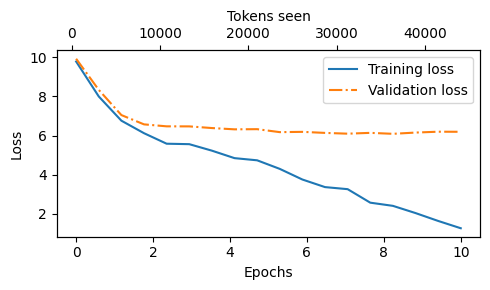

In [108]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    # Create a second x-axis for tokens seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, tokens_seen, train_losses, val_losses)

## DECODING STRATEGIES TO CONTROL RANDOMNESS

In [109]:
tokenizer = tiktoken.get_encoding("gpt2")

token_ids = generate_text_simple(
    model=model,
    idx=text_to_token_ids("Every effort moves you", tokenizer),
    max_new_tokens=25,
    context_size=GPT_CONFIG_124M["context_length"]
)

print("Output text:\n", token_ids_to_text(token_ids, tokenizer))

Output text:
 Every effort moves you know; and up-stream stroke. Gisburn--as, in a self-confident moustache, I


Higher temperature = more randomness and creativity.

Lower temperature = more coherence and predictability.

Temperature = 1.0 = default, balanced behavior.




In [110]:
vocab = {
    "closer": 0,
    "every": 1,
    "effort": 2,
    "forward": 3,
    "inches": 4,
    "moves": 5,
    "pizza": 6,
    "toward": 7,
    "you": 8,
}

inverse_vocab = {v: k for k, v in vocab.items()}

In [111]:
next_token_logits = torch.tensor(
[4.51, 0.89, -1.90, 6.75, 1.63, -1.62, -1.89, 6.28, 1.79]
)

<div class="alert alert-block alert-success">

As discussed in the previous chapter, inside the generate_text_simple, we convert the
logits into probabilities via the softmax function and obtain the token ID corresponding the
generated token via the argmax function, which we can then map back into text via the
inverse vocabulary:

</div>

In [112]:
probas = torch.softmax(next_token_logits, dim=0)
next_token_id = torch.argmax(probas).item()
print(inverse_vocab[next_token_id])

forward


<div class="alert alert-block alert-success">

To implement a probabilistic sampling process, we can now replace the argmax with the
multinomial function in PyTorch:

</div>

In [113]:
torch.manual_seed(123)
next_token_id = torch.multinomial(probas, num_samples=1).item()
print(inverse_vocab[next_token_id])

toward


<div class="alert alert-block alert-success">

The printed output is "forward" just like before. What happened? The multinomial
function samples the next token proportional to its probability score.

In other words,
"forward" is still the most likely token and will be selected by multinomial most of the
time but not all the time.

To illustrate this, let's implement a function that repeats this
sampling 1000 times:

</div>

In [114]:
def print_sampled_tokens(probas):
    torch.manual_seed(123) # Manual seed for reproducibility
    sample = [torch.multinomial(probas, num_samples=1).item() for i in range(1_000)]
    sampled_ids = torch.bincount(torch.tensor(sample))
    for i, freq in enumerate(sampled_ids):
        print(f"{freq} x {inverse_vocab[i]}")

print_sampled_tokens(probas)

71 x closer
2 x every
0 x effort
544 x forward
2 x inches
1 x moves
0 x pizza
376 x toward
4 x you


<div class="alert alert-block alert-info">

As we can see based on the output, the word "forward" is sampled most of the time (582
out of 1000 times), but other tokens such as "closer", "inches", and "toward" will also
be sampled some of the time.

This means that if we replaced the argmax function with the
multinomial function inside the generate_and_print_sample function, the LLM would
sometimes generate texts such as "every effort moves you toward", "every effort
moves you inches", and "every effort moves you closer" instead of "every effort
moves you forward".
    
</div>

**<div class="alert alert-block alert-success">

We can further control the distribution and selection process via a concept called
temperature scaling, where temperature scaling is just a fancy description for dividing the
logits by a number greater than 0:

</div>**

In [115]:
def softmax_with_temperature(logits, temperature):
    scaled_logits = logits / temperature
    return torch.softmax(scaled_logits, dim=0)

# Temperature values
temperatures = [1, 0.1, 5]  # Original, higher confidence, and lower confidence

# Calculate scaled probabilities
scaled_probas = [softmax_with_temperature(next_token_logits, T) for T in temperatures]

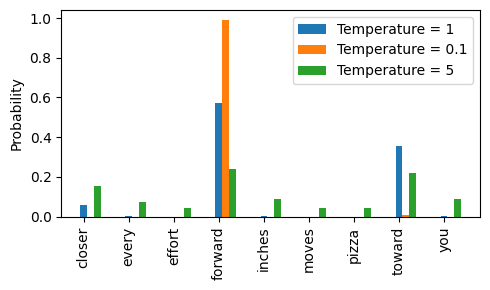

In [116]:
# Plotting
x = torch.arange(len(vocab))
bar_width = 0.15

fig, ax = plt.subplots(figsize=(5, 3))
for i, T in enumerate(temperatures):
    rects = ax.bar(x + i * bar_width, scaled_probas[i], bar_width, label=f'Temperature = {T}')

ax.set_ylabel('Probability')
ax.set_xticks(x)
ax.set_xticklabels(vocab.keys(), rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig("temperature-plot.pdf")
plt.show()

<div class="alert alert-block alert-info">

Applying very small temperatures, such as 0.1, will
result in sharper distributions such that the behavior of the multinomial function selects
the most likely token (here: "forward") almost 100% of the time, approaching the
behavior of the argmax function.

Vice versa, a temperature of 5 results in a more uniform
distribution where other tokens are selected more often.

This can add more variety to the
generated texts but also more often results in nonsensical text.

For example, using the
temperature of 5 results in texts such as "every effort moves you pizza" about 4% of
the time.
    
</div>

Left top-k and tp p sampling and fine tunning etc